# Setup

In [1]:
# libraries
import matplotlib.pyplot as plt
import numpy as np
import networkx as nx
import powerlaw

# color scheme
plt.style.use('fivethirtyeight')

# matplotlib optioons
# ticks
import pylab
pylab.rcParams['xtick.major.pad']='8'
pylab.rcParams['ytick.major.pad']='8'
#pylab.rcParams['font.sans-serif']='Arial'
# fotns
from matplotlib import rc
rc('font', family='sans-serif')
rc('font', size=10.0)
rc('text', usetex=False)
from matplotlib.font_manager import FontProperties
panel_label_font = FontProperties().copy()
panel_label_font.set_weight("bold")
panel_label_font.set_size(12.0)
panel_label_font.set_family("sans-serif")

# suppress warnings
import warnings
warnings.filterwarnings("ignore")

# Simulate network data

In [2]:
# parms for scale-free net
n = 5000

# graph
sfn = nx.scale_free_graph(n)

In [3]:
# node degree
node_degree = nx.degree(sfn)

In [4]:
# data series to plot
x = [d for n, d in node_degree]

# Powerlaw analysis

## Estimate the $\alpha$ parameter

In [6]:
# fit powerlaw
fit = powerlaw.Fit(x)
alpha = fit.power_law.alpha
sigma = fit.power_law.sigma
cmp = fit.distribution_compare('power_law', 'exponential')
print(
    """
    alpha: {}
    sigma: {}

    Similarity to powerlaw: {}
    p-value: {}
    """.format(np.round(alpha, 2), np.round(sigma,2), np.round(cmp[0],2), np.round(cmp[1],3)))


    alpha: 2.44
    sigma: 0.07

    Similarity to powerlaw: 410.99
    p-value: 0.0
    


Calculating best minimal value for power law fit


## Plot degree distribution

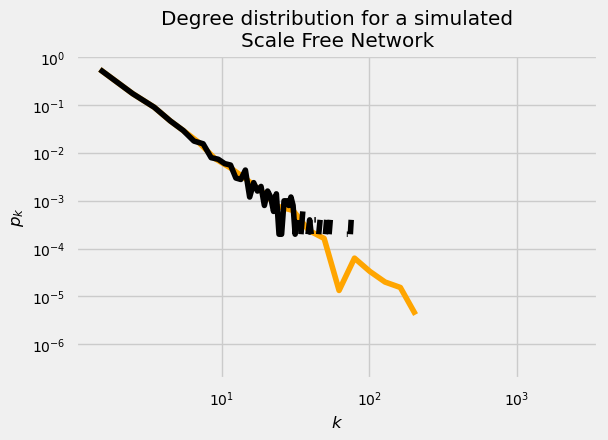

In [12]:
# create figure
fig = plt.figure(figsize=(6, 4))

# add plot
ax = fig.add_subplot(1, 1, 1)

# plot data
powerlaw.plot_pdf(x, color='orange', ax=ax)
powerlaw.plot_pdf(x, linear_bins=True, color='black', ax=ax)

# title
ax.set_title("Degree distribution for a simulated\nScale Free Network")

# labels
ax.set_ylabel(r"$p_{k}$")
ax.set_xlabel(r"$k$")

# show plot
plt.show()

## Identify the scaling range

Calculating best minimal value for power law fit
Calculating best minimal value for power law fit


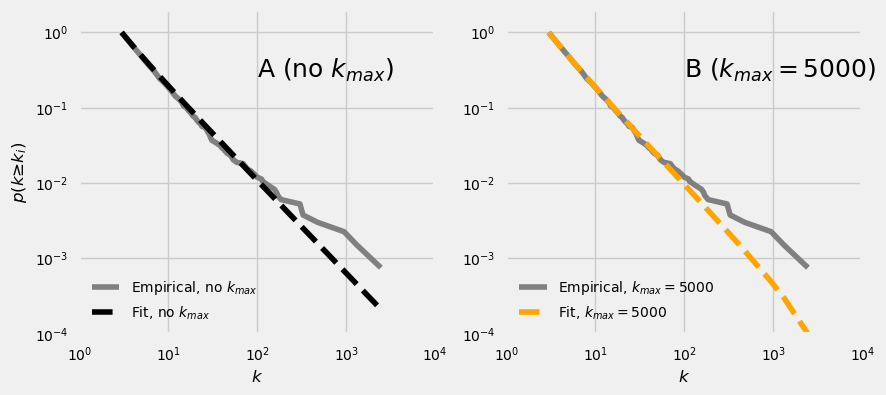

In [15]:
## create figure
fig = plt.figure(figsize=(9, 4))

# add plots
ax0 = fig.add_subplot(1, 2, 1)
ax1 = fig.add_subplot(1, 2, 2)

# plot data

# panel A -- we assume the distribution has no upper bound
# --------------------------------------------------------
fit = powerlaw.Fit(x, discrete=True, xmax=None, ax=ax0)
fit.plot_ccdf(color='grey', label=r"Empirical, no $k_{max}$", ax=ax0) #  complementary cumulative distribution function
fit.power_law.plot_ccdf(color='black', linestyle='--', label=r"Fit, no $k_{max}$", ax=ax0)

# axes
ax0.set_ylim(10**-4, 2)
ax0.set_xlim(np.min(x), 10**4)

# labels
ax0.set_ylabel(u"$p(k ≥ k_{i})$")
ax0.set_xlabel(r"$k$")
handles, labels = ax0.get_legend_handles_labels()

# textbox
ax0.text(10**2, 10**-0.5, r'A (no $k_{max}$)', verticalalignment='center', fontsize=18)

# legend
leg = ax0.legend(handles, labels, loc=3)
leg.draw_frame(False)

# panel B -- we assume the distribution has an upper bound = N (the size of the network)
# --------------------------------------------------------------------------------------
fit = powerlaw.Fit(x, discrete=True, xmax=n, sharey=True)
fit.plot_ccdf(color='grey', label=r"Empirical, $k_{max}=%s$" % n, ax=ax1)
fit.power_law.plot_ccdf(color='orange', linestyle='--', label=r"Fit, $k_{max}=%s$" % n, ax=ax1)

# axes
ax1.set_ylim(10**-4, 2)
ax1.set_xlim(np.min(x), 10**4)

# labels
# ax1.set_ylabel(u"$p(k ≥ k_{i})$")
ax1.set_xlabel(r"$k$")
handles, labels = ax1.get_legend_handles_labels()

# textbox
ax1.text(10**2, 10**-0.5, r'B ($k_{max} = %s$)' % n, verticalalignment='center', fontsize=18)

# legend
leg = ax1.legend(handles, labels, loc=3)
leg.draw_frame(False)

# show plot
plt.show()